## Analyse des Correspondances Multiples

On importe la librairie pandas pour charger les données, ainsi que la classe MCA du package fanalysis.

In [1]:
import pandas as pd
from fanalysis.mca import MCA
import matplotlib.pyplot as plt

In [6]:
df = pd.read_table("data/data_acm.txt", header=0, index_col=0)
df.describe()

Taille   Poids Velocite Intelligence Affection Agressivite  \
count         27      27       27           27        27          27   
unique         3       3        3            3         2           2   
top     Taille++  Poids+   Veloc-      Intell+    Affec+     Agress-   
freq          15      14       10           13        14          14   

         Fonction  
count          27  
unique          3  
top     compagnie  
freq           10

L'analyse va porter sur les 6 premières variables.

In [9]:
X = df.iloc[:, 0:6].values
X

array([['Taille++', 'Poids+', 'Veloc++', 'Intell+', 'Affec+', 'Agress+'],
       ['Taille-', 'Poids-', 'Veloc-', 'Intell-', 'Affec-', 'Agress+'],
       ['Taille++', 'Poids+', 'Veloc++', 'Intell++', 'Affec+', 'Agress+'],
       ['Taille+', 'Poids+', 'Veloc+', 'Intell+', 'Affec+', 'Agress+'],
       ['Taille-', 'Poids-', 'Veloc-', 'Intell+', 'Affec+', 'Agress-'],
       ['Taille++', 'Poids++', 'Veloc-', 'Intell++', 'Affec-', 'Agress+'],
       ['Taille-', 'Poids-', 'Veloc+', 'Intell++', 'Affec+', 'Agress-'],
       ['Taille-', 'Poids-', 'Veloc-', 'Intell-', 'Affec+', 'Agress-'],
       ['Taille+', 'Poids-', 'Veloc-', 'Intell+', 'Affec+', 'Agress+'],
       ['Taille++', 'Poids+', 'Veloc++', 'Intell+', 'Affec+', 'Agress-'],
       ['Taille+', 'Poids+', 'Veloc+', 'Intell+', 'Affec+', 'Agress-'],
       ['Taille++', 'Poids+', 'Veloc++', 'Intell++', 'Affec-', 'Agress+'],
       ['Taille++', 'Poids++', 'Veloc++', 'Intell-', 'Affec-', 'Agress+'],
       ['Taille+', 'Poids+', 'Veloc+', 'Intell+

On crée une instance de la classe MCA, en lui passant ici des étiquettes pour les lignes et les variables. Ces paramètres sont facultatifs ; en leur absence, le programme détermine automatiquement des étiquettes.

In [12]:
my_mca = MCA(row_labels=df.index.values, var_labels=df.columns.values[0:6])
my_mca

MCA(row_labels=array(['Beauceron', 'Basset', 'Berger All', 'Boxer', 'Bull-Dog',
       'Bull-Mastif', 'Caniche', 'Chihuahua', 'Cocker', 'Colley',
       'Dalmatien', 'Doberman', 'Dogue All', 'Epag. Breton',
       'Epag. Français', 'Fox-Hound', 'Fox-Terrier', 'Gd Bleu Gasc',
       'Labrador', 'Levrier', 'Mastiff', 'Pekinois', 'Pointer',
       'St-Bernard', 'Setter', 'Teckel', 'Terre-Neuve'], dtype=object),
    var_labels=array(['Taille', 'Poids', 'Velocite', 'Intelligence', 'Affection',
       'Agressivite'], dtype=object))

On estime le modèle en appliquant la méthode fit de la classe MCA sur le jeu de données.

In [22]:
my_mca.fit(X)

MCA(row_labels=array(['Beauceron', 'Basset', 'Berger All', 'Boxer', 'Bull-Dog',
       'Bull-Mastif', 'Caniche', 'Chihuahua', 'Cocker', 'Colley',
       'Dalmatien', 'Doberman', 'Dogue All', 'Epag. Breton',
       'Epag. Français', 'Fox-Hound', 'Fox-Terrier', 'Gd Bleu Gasc',
       'Labrador', 'Levrier', 'Mastiff', 'Pekinois', 'Pointer',
       'St-Bernard', 'Setter', 'Teckel', 'Terre-Neuve'], dtype=object),
    var_labels=array(['Taille', 'Poids', 'Velocite', 'Intelligence', 'Affection',
       'Agressivite'], dtype=object))

L'exécution de la méthode my_mca.fit(X) provoque a minima le calcul des attributs :

* my_pca.eig_ : valeurs propres
* my_pca.row_coord_ : coordonnées des points lignes
* my_pca.col_coord_ : coordonnées des points colonnes

### 1. Analyse des valeurs propres

L'attribut my_mca.eig_ contient :

* en 1ère ligne : les valeurs propres en valeur absolue
* en 2ème ligne : les valeurs propres en pourcentage de la variance totale
* en 3ème ligne : les valeurs propres en pourcentage cumulé de la variance totale

In [29]:
print(my_mca.eig_)
print("Les valeurs propres de chaque axe:")
for i in range(len(my_mca.eig_[0])):
    print("La valeur propre de l'axe:", i+1, "est :", my_mca.eig_[0][i])
    print("Le pourcentage de variance expliquée de l'axe:", i+1, "est :", my_mca.eig_[1][i])
    print("La variance cumulée est donc :", my_mca.eig_[2][i])
    

[[4.81606165e-01 3.84737288e-01 2.10954049e-01 1.57554025e-01
  1.50132670e-01 1.23295308e-01 8.14624601e-02 4.56697566e-02
  2.35419107e-02 7.71303416e-03]
 [2.88963699e+01 2.30842373e+01 1.26572430e+01 9.45324152e+00
  9.00796020e+00 7.39771849e+00 4.88774761e+00 2.74018539e+00
  1.41251464e+00 4.62782050e-01]
 [2.88963699e+01 5.19806071e+01 6.46378501e+01 7.40910916e+01
  8.30990518e+01 9.04967703e+01 9.53845179e+01 9.81247033e+01
  9.95372180e+01 1.00000000e+02]]
Les valeurs propres de chaque axe:
La valeur propre de l'axe: 1 est : 0.48160616463708655
Le pourcentage de variance expliquée de l'axe: 1 est : 28.896369878225205
La variance cumulée est donc : 28.896369878225205
La valeur propre de l'axe: 2 est : 0.38473728776718247
Le pourcentage de variance expliquée de l'axe: 2 est : 23.084237266030957
La variance cumulée est donc : 51.98060714425616
La valeur propre de l'axe: 3 est : 0.21095404931042558
Le pourcentage de variance expliquée de l'axe: 3 est : 12.65724295862554
La varia

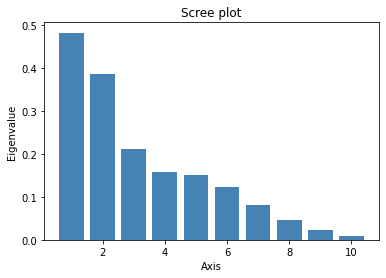

In [30]:
my_mca.plot_eigenvalues()

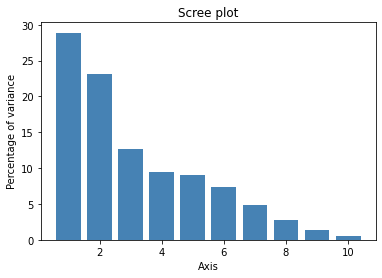

In [31]:
my_mca.plot_eigenvalues(type="percentage")

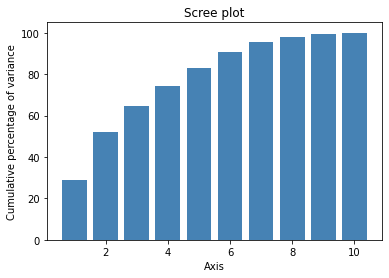

In [32]:
my_mca.plot_eigenvalues(type="cumulative")

Lors de l'exécution de la méthode my_mca.fit(X), les statistiques suivantes ont été calculées :

* my_mca.row_contrib_ : contributions des points lignes à la variance de l'axe
* my_mca.col_contrib_ : contributions des points colonnes à la variance de l'axe
* my_mca.row_cos2_ : cosinus carrés des points lignes
* my_mca.col_cos2_ : cosinus carrés des points colonnes

### 2. Extraction des statistiques sur les points lignes

In [33]:
df_rows = my_mca.row_topandas()
print(df_rows)

                row_coord_dim1  row_coord_dim2  row_coord_dim3  \
Beauceron            -0.317200       -0.417701       -0.101468   
Basset                0.254110        1.101227       -0.190701   
Berger All           -0.486396       -0.464450       -0.498134   
Boxer                 0.447365       -0.881778        0.692016   
Bull-Dog              1.013352        0.549879       -0.163423   
Bull-Mastif          -0.752574        0.546912        0.497573   
Caniche               0.912301       -0.016188       -0.576570   
Chihuahua             0.840799        0.843852       -0.469947   
Cocker                0.733295        0.079073        0.662230   
Colley               -0.117325       -0.526108       -0.334894   
Dalmatien             0.647240       -0.990184        0.458590   
Doberman             -0.873210       -0.315481       -0.452314   
Dogue All            -1.047017        0.506958        0.165035   
Epag. Breton          0.478044       -1.036933        0.061924   
Epag. Fran

In [37]:
# Coordonnées des points lignes
#print(my_mca.row_coord_)
print("Coordonnées des points lignes dans chaque axe")
for i in range(len(my_mca.row_coord_)):
    print("Les coordonnées de la race ", df.index.values[i] , "sont:", my_mca.row_coord_[i])

Coordonnées des points lignes dans chaque axe
Les coordonnées de la race  Beauceron sont: [-0.31720005 -0.4177013  -0.10146771 -0.21143628 -0.11850954 -0.84491727
 -0.08905015  0.20198641 -0.16701884  0.02280671]
Les coordonnées de la race  Basset sont: [ 0.25410984  1.10122699 -0.19070097  0.29263727 -0.52400852  0.03989468
 -0.05283316 -0.44736292  0.10073837  0.1471022 ]
Les coordonnées de la race  Berger All sont: [-0.48639553 -0.46444958 -0.49813388  0.57742525  0.27590205 -0.56776484
  0.12909684  0.18733032 -0.234185   -0.00891993]
Les coordonnées de la race  Boxer sont: [ 0.44736492 -0.88177794  0.6920158   0.26000184 -0.45558984 -0.21374584
  0.00300768 -0.01981927 -0.00244629  0.14090095]
Les coordonnées de la race  Bull-Dog sont: [ 1.01335218  0.54987949 -0.1634232  -0.34991927  0.33078648 -0.20141418
 -0.06354408 -0.07903568 -0.03560244  0.06654325]
Les coordonnées de la race  Bull-Mastif sont: [-0.75257449  0.54691183  0.49757307  0.65515266  0.72194636  0.11792581
  0.018

In [49]:
# Contributions des points lignes
for i in range(len(my_mca.row_contrib_)):
    print("Les contributions aux", len(my_mca.eig_[0])," axes de la race " , df.index.values[i] , "sont:" ,my_mca.row_contrib_[i])


Les contributions aux 10  axes de la race  Beauceron sont: [ 0.77376788  1.67959126  0.18076074  1.05091056  0.34647163 21.44460561
  0.36053553  3.30865774  4.38859435  0.2497678 ]
Les contributions aux 10  axes de la race  Basset sont: [ 0.49657766 11.6741602   0.63849009  2.01310302  6.7738835   0.0478101
  0.12690884 16.23033608  1.59655665 10.39080743]
Les contributions aux 10  axes de la race  Berger All sont: [1.81937974 2.07658208 4.35652825 7.83787399 1.8778932  9.68337324
 0.75772206 2.8459266  8.62805061 0.03820624]
Les contributions aux 10  axes de la race  Boxer sont: [1.53910433e+00 7.48497608e+00 8.40776174e+00 1.58913049e+00
 5.12046123e+00 1.37241366e+00 4.11284205e-04 3.18553782e-02
 9.41477848e-04 9.53320231e+00]
Les contributions aux 10  axes de la race  Bull-Dog sont: [7.89705226 2.91076402 0.46889522 2.87834243 2.69933348 1.21862409
 0.18358151 0.50658688 0.19941323 2.12627267]
Les contributions aux 10  axes de la race  Bull-Mastif sont: [ 4.35555187  2.87943048  

In [50]:
# Cos2 des points lignes
print(my_mca.row_cos2_)

[[8.86354732e-02 1.53699594e-01 9.06978140e-03 3.93822110e-02
  1.23722226e-02 6.28882412e-01 6.98570800e-03 3.59406044e-02
  2.45737810e-02 4.58212084e-04]
 [3.38043142e-02 6.34867136e-01 1.90385973e-02 4.48320320e-02
  1.43749337e-01 8.33218971e-04 1.46130981e-03 1.04772939e-01
  5.31274484e-03 1.13283712e-02]
 [1.53722499e-01 1.40163659e-01 1.61231704e-01 2.16645575e-01
  4.94615977e-02 2.09457186e-01 1.08290285e-02 2.28020784e-02
  3.56349731e-02 5.16989317e-05]
 [1.11330751e-01 4.32523528e-01 2.66393303e-01 3.76048711e-02
  1.15462068e-01 2.54147956e-02 5.03216176e-06 2.18507578e-04
  3.32894680e-06 1.10438146e-02]
 [6.24484641e-01 1.83880633e-01 1.62415840e-02 7.44623393e-02
  6.65420938e-02 2.46706743e-02 2.45556352e-03 3.79880801e-03
  7.70833162e-04 2.69282992e-03]
 [2.70690765e-01 1.42958206e-01 1.18328181e-01 2.05144306e-01
  2.49106067e-01 6.64648773e-03 1.65247798e-04 6.65849872e-04
  6.00628608e-03 2.88603256e-04]
 [3.85193916e-01 1.21275082e-04 1.53853124e-01 1.82602376e

### 3. Extraction des statistiques sur les points colonnes

In [57]:
df_cols = my_mca.col_topandas()

print(df_cols)

                       col_coord_dim1  col_coord_dim2  col_coord_dim3  \
Taille_Taille+               0.851088       -1.231720        1.016052   
Taille_Taille++             -0.836675       -0.020578       -0.051217   
Taille_Taille-               1.184956        0.923897       -0.616000   
Poids_Poids+                -0.305405       -0.818876       -0.231272   
Poids_Poids++               -1.015134        0.973901        1.221595   
Poids_Poids-                 1.168918        0.824345       -0.358770   
Velocite_Veloc+              0.603687       -0.887814        0.356312   
Velocite_Veloc++            -0.892100       -0.371832       -0.763088   
Velocite_Veloc-              0.319941        1.044900        0.401729   
Intelligence_Intell+         0.369443       -0.285503        0.493203   
Intelligence_Intell++       -0.335066       -0.459483       -0.599924   
Intelligence_Intell-        -0.349045        0.808555       -0.351511   
Affection_Affec+             0.775496       -0.2669

In [54]:
# Coordonnées des points colonnes
for i in range(len(my_mca.col_coord_)):
    print("Les coordonnées de la modalité ", df_cols.index.values[i] , "sont:", my_mca.col_coord_[i])
#print(my_mca.col_coord_)

Les coordonnées de la modalité  Taille_Taille+ sont: [ 0.85108805 -1.23171972  1.01605178  0.34245635 -0.31004022  0.11829709
  0.85830588 -0.25959948  0.30732198  0.01520824]
Les coordonnées de la modalité  Taille_Taille++ sont: [-0.83667535 -0.02057846 -0.05121744 -0.17022176  0.11266304 -0.04996469
 -0.11784406  0.05641401 -0.14463269 -0.12155001]
Les coordonnées de la modalité  Taille_Taille- sont: [ 1.18495571  0.9238965  -0.61599962  0.12014924 -0.0199635   0.02256927
 -0.36055265  0.06454103  0.09041149  0.24960128]
Les coordonnées de la modalité  Poids_Poids+ sont: [-0.30540525 -0.81887572 -0.23127208 -0.11836395 -0.19020146  0.0129084
  0.03717755 -0.12567337 -0.18494632  0.09757299]
Les coordonnées de la modalité  Poids_Poids++ sont: [-1.01513413  0.97390062  1.22159452  0.06760494  0.61451838  0.28923175
  0.06786357  0.64150795  0.20400871  0.07149381]
Les coordonnées de la modalité  Poids_Poids- sont: [ 1.16891802  0.82434462 -0.35877044  0.16488382 -0.05122143 -0.20335954

In [58]:
# Contributions des points colonnes
for i in range(len(my_mca.col_coord_)): #auntant de contrib que de coord, pas obligé de changer ça
    print("Les contributions de la modalité ", df_cols.index.values[i] , "sont:", my_mca.col_contrib_[i])
#print(my_mca.col_contrib_)

Les contributions de la modalité  Taille_Taille+ sont: [ 4.6420727  12.17067028 15.10423747  2.29739639  1.97613161  0.35031326
 27.91140155  4.55442881 12.38227698  0.09255242]
Les contributions de la modalité  Taille_Taille++ sont: [1.34585463e+01 1.01914919e-02 1.15139433e-01 1.70285200e+00
 7.82823704e-01 1.87480502e-01 1.57846191e+00 6.45240301e-01
 8.22749141e+00 1.77362173e+01]
Les contributions de la modalité  Taille_Taille- sont: [1.25978150e+01 9.58661729e+00 7.77241612e+00 3.95909184e-01
 1.14704658e-02 1.78513713e-02 6.89545420e+00 3.94117907e-01
 1.50033602e+00 3.49020865e+01]
Les contributions de la modalité  Poids_Poids+ sont: [1.67368602e+00 1.50620723e+01 2.19114722e+00 7.68462024e-01
 2.08240645e+00 1.16791442e-02 1.46628075e-01 2.98862105e+00
 1.25563298e+01 1.06671161e+01]
Les contributions de la modalité  Poids_Poids++ sont: [ 6.60404174  7.60886705 21.83339533  0.08953284  7.76335649  2.0941143
  0.17449014 27.81188213  5.45645635  2.0453451 ]
Les contributions de

In [ ]:
# Cos2 des points colonnes
print(my_mca.col_cos2_)

### 4. Représentation graphique

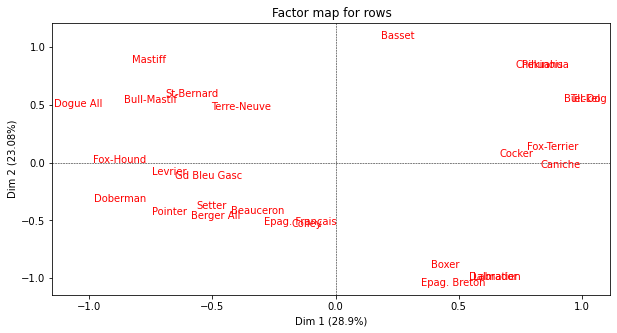

In [66]:
# Mapping des points lignes
my_mca.mapping_row(num_x_axis=1, num_y_axis=2, figsize=(10,5))

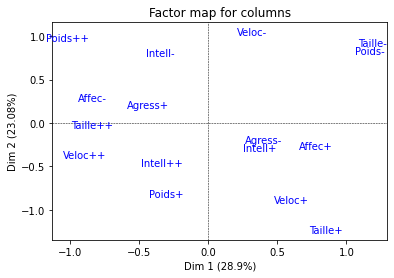

In [67]:
# Mapping des points colonnes
my_mca.mapping_col(num_x_axis=1, num_y_axis=2)

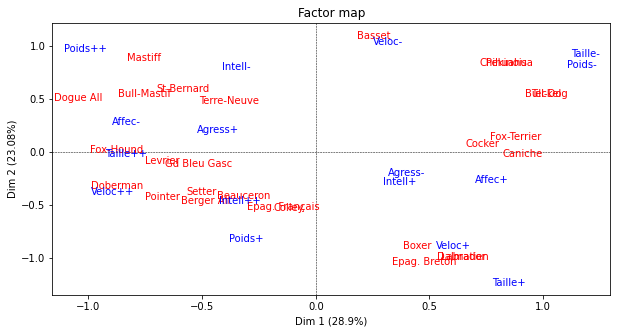

In [76]:
# Mapping simultané des points lignes et colonnes
# Les paramètres de la méthode mapping indiquent que ce sont les axes 1 et 2 qui sont ici représentés
my_mca.mapping(num_x_axis=1, num_y_axis=2, figsize=(10,5))

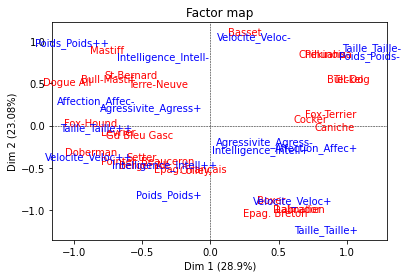

In [68]:
my_mca.mapping(num_x_axis=1, num_y_axis=2, short_labels=False)

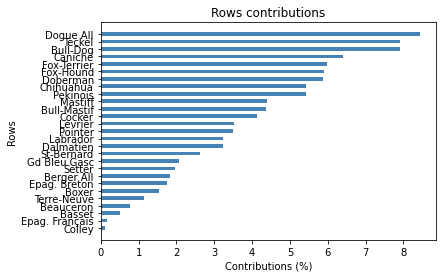

In [77]:
# Classement des points lignes en fonction de leur contribution au 1er axe
# Le paramètre de la méthode plot_row_contrib indique que c'est pour l'axe numéro 1 que les contributions sont ici 
# représentées
my_mca.plot_row_contrib(num_axis=1)

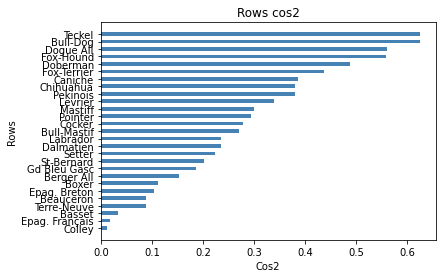

In [78]:
# Classement des points lignes en fonction de leur cos2 sur le 1er axe
my_mca.plot_row_cos2(num_axis=1)

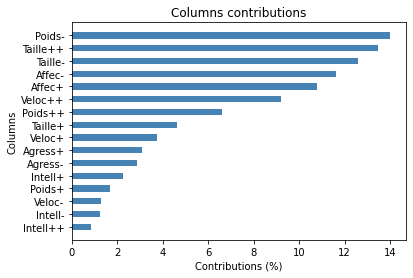

In [71]:
# Classement des points colonnes en fonction de leur contribution au 1er axe
my_mca.plot_col_contrib(num_axis=1)

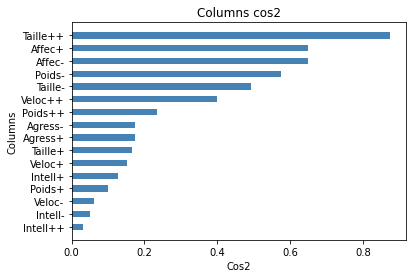

In [72]:
# Classement des points colonnes en fonction de leur cos2 sur le 1er axe
my_mca.plot_col_cos2(num_axis=1)

Pour ces graphiques produits par les méthodes plot_row_contrib, plot_row_cos2, plot_col_contrib, plot_col_cos2, on peut se limiter à visualiser les x valeurs les plus grandes via le paramètre nb_values.

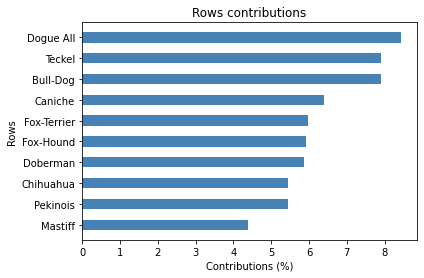

In [73]:
my_mca.plot_row_contrib(num_axis=1, nb_values=10)